In [35]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

In [3]:
import cv2

In [4]:
from scipy.misc import imresize

In [6]:
# Original
original = cv2.imread('woman.jpg',1)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

In [7]:
# Get images
image = img_to_array(load_img('woman.jpg'))
image = np.array(image, dtype=float)

In [8]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2) 

In [33]:
# multiple img
Xs=[]
Ys=[]
num=20
for i in range(num):
    fn = '{0:s}/{1:s}/{1:s}_{2:04d}.jpg'.format('train','people face', i)  
    #im = skimage.io.imread(fn)
    image = img_to_array(load_img(fn))
    image = np.array(image, dtype=float)
    X = rgb2lab(1.0/255*image)[:,:,0]
    Y = rgb2lab(1.0/255*image)[:,:,1:]
    Y /= 128
    X = X.reshape(1, 400, 400, 1)
    Y = Y.reshape(1, 400, 400, 2)
    Xs.append(X)
    Ys.append(Y)
Xs=np.array(Xs)
Ys=np.array(Ys)

X=np.reshape(Xs, (num, 400, 400, 1))
Y=np.reshape(Ys, (num, 400, 400, 2))
    

In [25]:
# Building the neural network 九层神经网络 跑一次就行了
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [26]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [36]:
# 5 mins 823pm-31; 209-
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=100, callbacks=[EarlyStopping(patience=3)])


Epoch 1/100
20/20 [==============================] - 8s - loss: 0.0061     

/Users/xiaosg/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:496: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning



Epoch 2/100
20/20 [==============================] - 9s - loss: 0.0058     
Epoch 3/100
20/20 [==============================] - 9s - loss: 0.0056     
Epoch 4/100
20/20 [==============================] - 10s - loss: 0.0057    
Epoch 5/100
20/20 [==============================] - 8s - loss: 0.0056     
Epoch 6/100
20/20 [==============================] - 8s - loss: 0.0057     
Epoch 7/100
20/20 [==============================] - 8s - loss: 0.0056     
Epoch 8/100
20/20 [==============================] - 8s - loss: 0.0056     
Epoch 9/100
20/20 [==============================] - 8s - loss: 0.0057     
Epoch 10/100
20/20 [==============================] - 8s - loss: 0.0054     
Epoch 11/100
20/20 [==============================] - 8s - loss: 0.0055     
Epoch 12/100
20/20 [==============================] - 8s - loss: 0.0055     
Epoch 13/100
20/20 [==============================] - 8s - loss: 0.0054     
Epoch 14/100
20/20 [==============================] - 8s - loss: 0.0054     
Epoch 

In [37]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [11]:
from keras.models import model_from_json

In [38]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

In [39]:
imagetest = img_to_array(load_img('heibai.jpeg'))
imagetest=imresize(imagetest, (400, 400, 3))
imagetest = np.array(imagetest, dtype=float)
Xtest = rgb2lab(1.0/255*imagetest)[:,:,0]
Ytest = rgb2lab(1.0/255*imagetest)[:,:,1:]
Ytest /= 128
Xtest = Xtest.reshape(1, 400, 400, 1)
Ytest = Ytest.reshape(1, 400, 400, 2) 

In [40]:

#print(model.evaluate(Xtest, Ytest, batch_size=1))
output = loaded_model.predict(Xtest)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = Xtest[0][:,:,0]
cur[:,:,1:] = output[0]
#imsave("img_result.png", lab2rgb(cur))
#imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))


In [15]:
import matplotlib.pyplot as plt

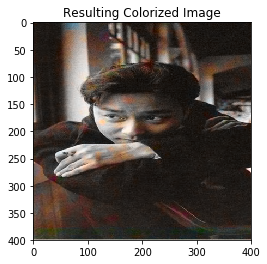

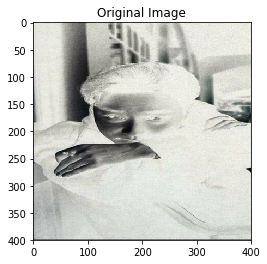

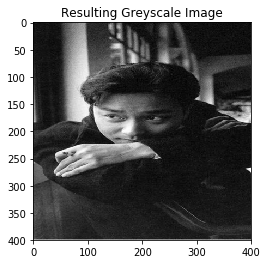

In [41]:
plt.imshow(lab2rgb(cur))
plt.title('Resulting Colorized Image')
plt.show()

plt.imshow(imagetest)
plt.title('Original Image')
plt.show()

plt.imshow(rgb2gray(lab2rgb(cur)), cmap=plt.cm.gray)
plt.title('Resulting Greyscale Image')
plt.show()

In [23]:
X.shape

(5, 400, 400, 1)

In [21]:
np.shape(Xtest)

(1, 400, 400, 1)